In [ ]:
#https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

In [33]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [34]:
df = pd.read_csv("LinRegr_15.csv", sep=",")
df = df.drop(df.columns[[0]], axis=1)
df.head()

0         1         2         3         4         5         6  \
0  1.150337  0.060171 -0.585120  0.353975 -0.077975  0.924968 -1.063031   
1  0.957187 -1.614714 -0.676751  0.173835  1.060224 -0.182198 -0.068978   
2  0.773648  0.723875 -0.616846  0.774110  0.062437  0.032997  0.832009   
3 -1.372574 -1.034003  0.639447 -0.977891 -1.657063  0.734684 -1.287063   
4 -0.688709 -0.177858 -0.597723 -1.216735  0.133526  0.838117 -1.178599   

          7         8           Y  
0  1.064993  0.499018   54.933749  
1 -0.691091 -0.971354 -137.359260  
2 -1.167025  1.000568  134.980557  
3  0.728523  1.240823  -52.508283  
4  1.641426  0.731159  -90.783648

In [35]:
X = df.drop('Y', axis=1)
y = df['Y']

In [36]:
X

0         1         2         3         4         5         6  \
0    1.150337  0.060171 -0.585120  0.353975 -0.077975  0.924968 -1.063031   
1    0.957187 -1.614714 -0.676751  0.173835  1.060224 -0.182198 -0.068978   
2    0.773648  0.723875 -0.616846  0.774110  0.062437  0.032997  0.832009   
3   -1.372574 -1.034003  0.639447 -0.977891 -1.657063  0.734684 -1.287063   
4   -0.688709 -0.177858 -0.597723 -1.216735  0.133526  0.838117 -1.178599   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.179682 -1.990921  0.172618 -1.336380 -1.038045  0.270402  0.279139   
996  0.339648  1.637251  0.827417  0.977966 -0.979051  1.202997  0.541902   
997  1.156644 -0.514750 -0.573316  2.218065 -0.332005 -1.059369  0.477669   
998 -2.099974  1.162419 -0.374337 -0.966872  0.143866 -0.706591 -1.054340   
999  0.397943 -1.053699 -0.504853  1.032294 -0.668183  0.600711  1.070861   

            7         8  
0    1.064993  0.499018  
1   -0.691091 -0.971354  
2   -1.167025  1.000568  
3    0.728523  1.240823  
4    1.641426  0.731159  
..        ...       ...  
995  0.417390 -0.888523  
996 -2.404251  0.291513  
997  1.941707  1.175740  
998 -0.494307 -1.003895  
999  0.493412  2.173297  

[1000 rows x 9 columns]

In [37]:
y

0       54.933749
1     -137.359260
2      134.980557
3      -52.508283
4      -90.783648
          ...    
995   -157.168481
996     85.905261
997    419.506500
998   -320.435187
999    330.337112
Name: Y, Length: 1000, dtype: float64

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(750, 9)
(750,)
(250, 9)
(250,)


In [39]:
scaler = StandardScaler()
# Fit only on X_train
scaler.fit(X_train)

# Scale both X_train and X_test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
scaled_df = pd.DataFrame(X_train)
scaled_df

0         1         2         3         4         5         6  \
0    0.619873 -1.310967  0.942542  0.771943 -1.390582 -0.895884 -0.216896   
1   -0.738691 -0.800149 -0.916545  1.828440 -0.924065  0.311995 -0.872008   
2    0.153360 -1.690112 -2.366707  0.683551  0.625964 -0.956942  0.783975   
3   -0.069917 -0.656795  1.621871 -1.829184 -0.290238  0.216432 -1.179557   
4   -0.057184 -1.515438  1.260224 -0.641184  1.164374 -0.067491  0.089802   
..        ...       ...       ...       ...       ...       ...       ...   
745 -0.172488  0.804650  1.376190 -1.823762 -0.371272 -0.843838  0.037876   
746 -0.911048  0.248887 -0.664670 -1.567767 -2.064043  0.647496  0.186226   
747 -0.835444 -2.195413  1.652327  0.531606  1.228434 -0.631996  1.152423   
748  1.313974  1.281373  0.948462 -0.514928 -1.486793  1.739546  0.620286   
749  1.225239  1.809169 -1.531303  0.999133 -0.046713  1.503940 -1.728315   

            7         8  
0   -0.172902  0.535058  
1    0.012583  0.124138  
2   -0.536858  0.222581  
3    0.093960  0.550631  
4   -0.298121  1.827670  
..        ...       ...  
745  0.164007  0.066210  
746 -0.180046  0.157975  
747  1.122833  0.662061  
748  0.880963  0.394442  
749 -0.972568 -0.451483  

[750 rows x 9 columns]

In [32]:
y_train

639    138.947623
587     36.311133
980    -37.118712
197   -109.463148
231    127.688372
          ...    
30     -54.363174
850   -169.077346
506    280.545082
212    187.653394
697   -137.477829
Name: Y, Length: 750, dtype: float64

In [19]:
regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(X_train, y_train)
regressor_test = KNeighborsRegressor(n_neighbors=5)
regressor_test.fit(X_test, y_test)

KNeighborsRegressor()

In [20]:
y_pred = regressor.predict(X_test)

In [21]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'mae: {mae}')
print(f'mse: {mse}')

mae: 56.394690473441734
mse: 4921.46677824587


In [22]:
regressor.score(X_test, y_test)

0.8015691182616836

In [23]:
y.describe()

count    1000.000000
mean        7.969253
std       152.182113
min      -465.081243
25%       -97.799572
50%        13.277700
75%       113.249265
max       447.665399
Name: Y, dtype: float64

In [24]:
error = []

# Calculating MAE error for K values between 1 and 39
for i in range(1, 40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    mae = mean_absolute_error(y_test, pred_i)
    error.append(mae)

Text(0, 0.5, 'Mean Absolute Error')

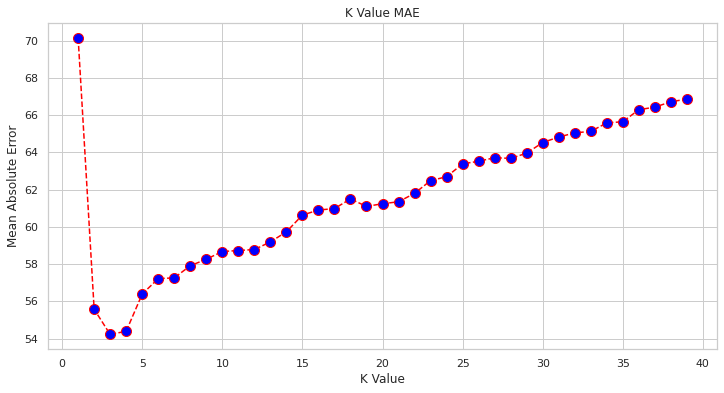

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
         
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

Text(0, 0.5, 'Mean Absolute Error')

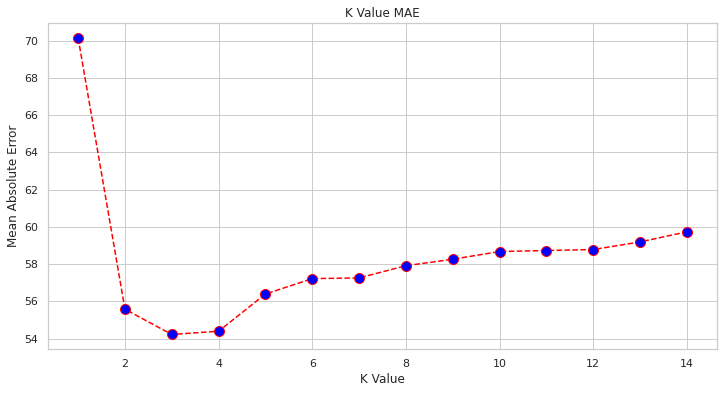

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 15), error[:14], color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

In [27]:
print(min(error))               
print(np.array(error).argmin()) 

54.223386062256864
2


In [28]:
knn_reg7 = KNeighborsRegressor(n_neighbors=7)
knn_reg7.fit(X_train, y_train)
y_pred7 = knn_reg7.predict(X_test)

mae7 = mean_absolute_error(y_test, y_pred7)
mse7 = mean_squared_error(y_test, y_pred7)
print(f'mae: {mae7} \nmse: {mse7}')

mae: 57.26110171056658 
mse: 4904.895601589381


In [31]:
knn_reg7 = KNeighborsRegressor(n_neighbors=7)
knn_reg7.fit(X_train, y_train)
y_pred_train = knn_reg7.predict(X_train)

# mae7 = mean_absolute_error(y_test, y_pred_train)
mse7 = mean_squared_error(y_test, y_pred)
print(f'mae: {mae7} \nmse: {mse7}')

mae: 57.26110171056658 
mse: 4921.46677824587
